# Graded Assignment 2
Mark Klik & Misja Mikkers

# Packages

# Assignment 1

First load the `tidyverse` package:

In [3]:
library(tidyverse)

##  Assignment 1a

Read the data file _graded_assignment_2.csv_ from disk:

In [4]:
data1 <- read.csv2("../Sourcedata/graded_assignment_2.csv")
head(data1)

ID,Group,FKG,DKG,Gender,Elderly,Age
1,39,1,1,female,65+,90 - 94
2,14,0,1,male,65+,65 - 69
3,3,1,0,male,65-,10 - 14
4,27,0,0,female,65-,30 - 34
5,40,1,0,female,65+,95 - 99
6,39,1,0,female,65+,90 - 94


## Assignment 1b

Add column "Health_status" with containing values _1_ (Healthy) and _0_ (Unhealthy).
A person is Healthy, when `FKG` equals 0 and `DKG` equals 0.

So

| FKG | DKG | Health_status   |
|-----|-----|--------------   |
| 0   | 0   | 1               |
| 1   | 0   | 0               |
| 0   | 1   | 0               |
| 1   | 1   | 0               |

Hint: you can use `ifelse()`:

In [5]:
data2 <- data1 %>%
mutate(Health_status = ifelse(FKG == 0 & DKG == 0, "1", "0"))
  

In the next datacamp course you will learn more about the package `dplyr`. For now we just give you some code. You can run the following script.

First, we want to make "Health_status" a factor instead of a character

In [6]:
data2 <- data2 %>%
  mutate(Health_status = as.numeric(Health_status))
str(data2)

'data.frame':	10000 obs. of  8 variables:
 $ ID           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Group        : int  39 14 3 27 40 39 39 40 3 14 ...
 $ FKG          : int  1 0 1 0 1 1 1 1 1 1 ...
 $ DKG          : int  1 1 0 0 0 0 1 0 1 1 ...
 $ Gender       : Factor w/ 2 levels "female","male": 1 2 2 1 1 1 1 1 2 2 ...
 $ Elderly      : Factor w/ 2 levels "65+","65-": 1 1 2 2 1 1 1 1 2 1 ...
 $ Age          : Factor w/ 20 levels "0 - 4","10 - 14",..: 19 14 2 6 20 19 19 20 2 14 ...
 $ Health_status: num  0 0 0 1 0 0 0 0 0 0 ...


Then, we want to count the number of healthy and unhealthy males and females

In [7]:
data3 <- data2 %>%
  group_by(Gender, Health_status) %>%
 summarise(Count_observations = n()) %>%
  mutate(Health_status=as.factor(Health_status))

data3

Gender,Health_status,Count_observations
female,0,3754
female,1,1253
male,0,3700
male,1,1293


## Assignment 2

Recreate with the dataframe "data3" the following barchart ![](../Sourcedata/barchart.png)

* Hint: see for changing the [legends and colors](http://www.cookbook-r.com/Graphs/Legends_(ggplot2)/)
* Hint: the "green" color is in fact the color "greenyellow"
* Hint: see for the [themes](http://ggplot2.tidyverse.org/reference/ggtheme.html): 



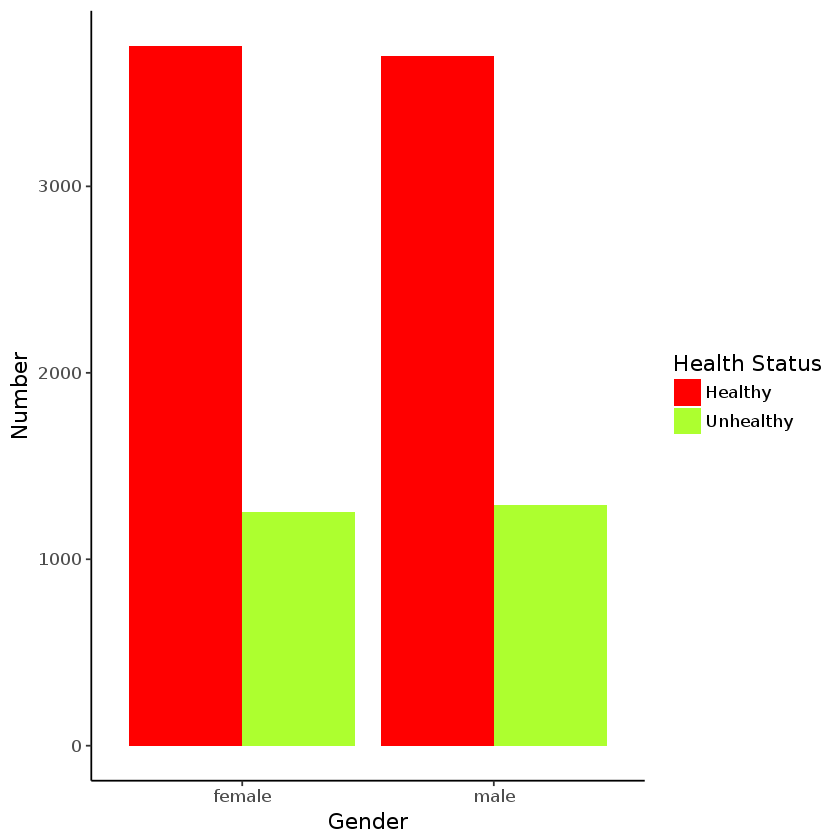

In [14]:
ggplot(data3, aes(x = Gender, y = Count_observations, fill = Health_status)) +
geom_col(position = "dodge") +
labs(x = "Gender", y = "Number") +
theme_classic(base_size = 13) + 
scale_fill_manual(values = c("red", "greenyellow"), name = "Health Status", labels = c("Healthy", "Unhealthy"))

End notebook